In [44]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [45]:
#retrieve data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv',index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df=pd.DataFrame(df)
df.head

<bound method NDFrame.head of                           ticker    instrument_token      open      high  \
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2022-12-26 09:15:00+05:30   NSEI  uf-n-1647516806122  17832.90  18084.10   
2022-12-27 09:15:00+05:30   NSEI  uf-n-1647516806122  18081.90  18149.25   
2022-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  18093.00  18173.10   
2022-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  18059.80  18229.70   
2022-12-30 09:15:00+05:30   NSEI  uf-n-1647516806122  18264.70  18265.25   

                                low     close  
2017-01-0

In [46]:
#train/test split
train=df.loc[df.index<'01-01-2021']
x_train = train[['open','high','low']]
y_train = train[['close']]
test=df.loc[df.index>='01-01-2021']
x_test = test[['open','high','low']]
y_test = test[['close']]

In [51]:
from sklearn.ensemble import RandomForestRegressor

# create Random Forest Regressor object 
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 1,min_samples_leaf=3) 

In [52]:
# Fitting RF Regression to the Training set
regressor.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=1000, random_state=1)

In [63]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred,index=x_test.index)
y_pred

,0
2021-01-01 09:15:00+05:30,13867.745342
2021-01-04 09:15:00+05:30,13867.745342
2021-01-05 09:15:00+05:30,13867.745342
2021-01-06 09:15:00+05:30,13867.745342
2021-01-07 09:15:00+05:30,13867.745342
...,...
2022-12-26 09:15:00+05:30,13867.745342
2022-12-27 09:15:00+05:30,13867.745342
2022-12-28 09:15:00+05:30,13867.745342
2022-12-29 09:15:00+05:30,13867.745342


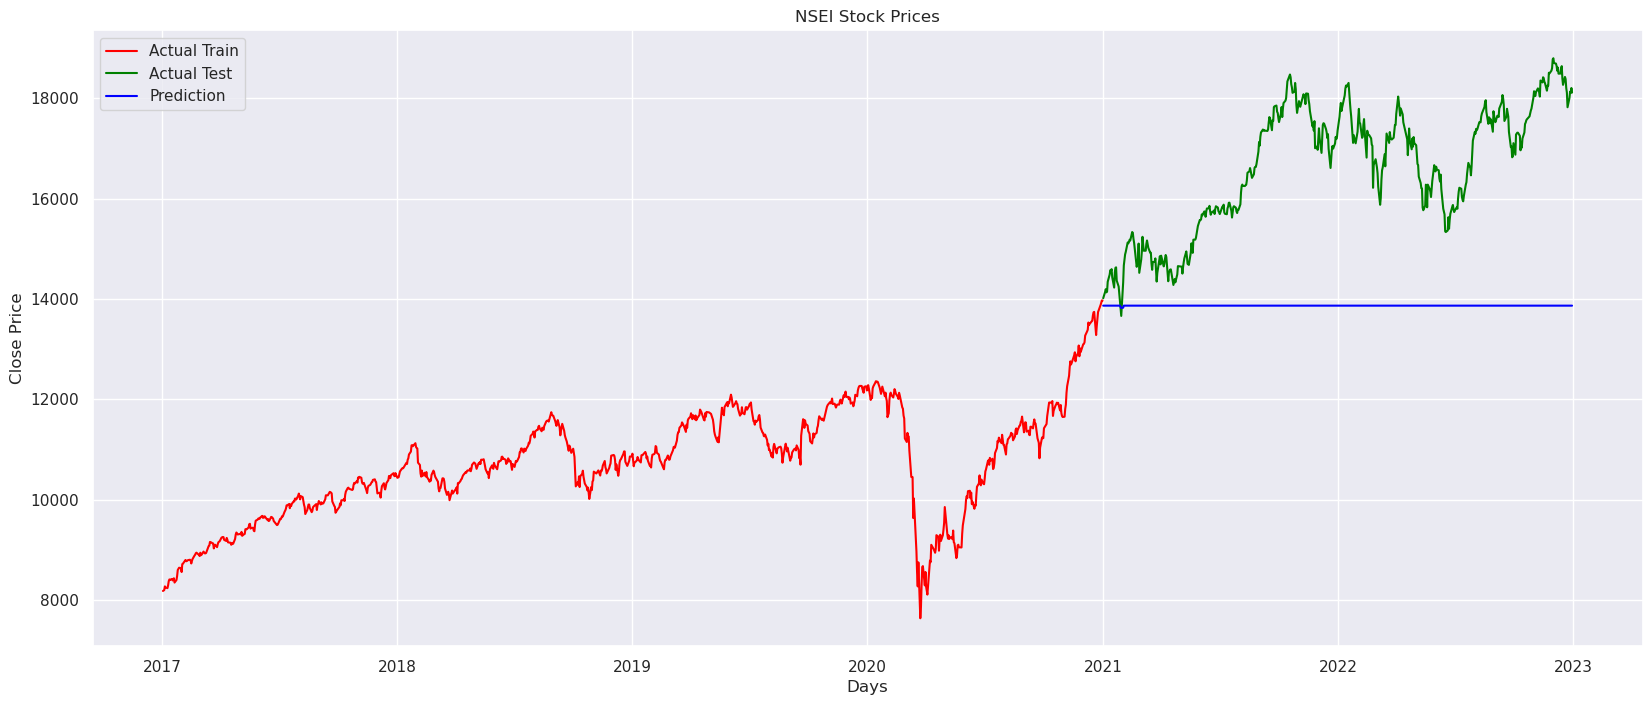

In [64]:
#plotting
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(y_train, color = 'red', label="Actual Train")
plt.plot(y_test, color='green', label="Actual Test")
plt.plot(y_pred, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()